You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer) 
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer) 
4. SkinThickness: Triceps skin fold thickness (mm) (integer) 
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer) 
6. BMI: Body mass index (weight in kg/(height in m)^2) (float) 
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float) 
8. Age: Age in years (integer) 
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

# IMPORTING BASIC LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,classification_report,auc

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Conclusion
- Glucose,BloodPressure,SkinThickness,Insulin,BMI have minimum value zero which is not possible

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [6]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [7]:
df['Glucose'].replace(0,df['Glucose'].median(),inplace=True)

In [8]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [9]:
df['BloodPressure'].replace(0,df['BloodPressure'].median(),inplace=True)

In [10]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [11]:
df['SkinThickness'].replace(0,df['SkinThickness'].median(),inplace=True)

In [12]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [13]:
df['Insulin'].replace(0,df['Insulin'].median(),inplace=True)

In [14]:
df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [15]:
df['BMI'].replace(0,df['BMI'].median(),inplace=True)

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [17]:
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
treeclassifier = DecisionTreeClassifier()

In [20]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=treeclassifier.predict(X_test)

In [22]:
y_score = treeclassifier.predict_proba(X_test)[:, 1] 

In [23]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[75 15]
 [24 40]]
0.7467532467532467
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        90
           1       0.73      0.62      0.67        64

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.74      0.75      0.74       154



In [24]:
pred = treeclassifier.predict(X_train)

In [25]:
print(accuracy_score(pred,y_train))

1.0


- we see that there is big difference in training and testing score ,our model is overfitting model thats we we gonna use hyperparamet and pruning methos

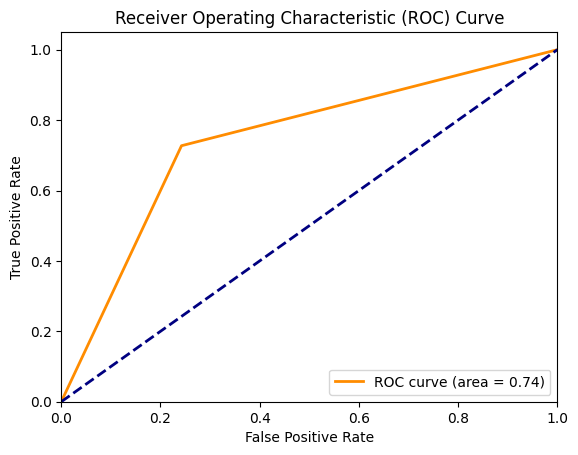

In [26]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

# DecisionTree Prepruning And Hyperparameter Tuning 

[Text(0.4852237654320988, 0.9642857142857143, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.2169753086419753, 0.8928571428571429, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.08765432098765433, 0.8214285714285714, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.019753086419753086, 0.75, 'x[6] <= 0.672\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.009876543209876543, 0.6785714285714286, 'gini = 0.0\nsamples = 104\nvalue = [104, 0]'),
 Text(0.02962962962962963, 0.6785714285714286, 'x[5] <= 23.55\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.019753086419753086, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03950617283950617, 0.6071428571428571, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.15555555555555556, 0.75, 'x[5] <= 49.1\ngini = 0.265\nsamples = 102\nvalue = [86, 16]'),
 Text(0.11358024691358025, 0.6785714285714286, 'x[6] <= 0.501\ngini = 0.243\

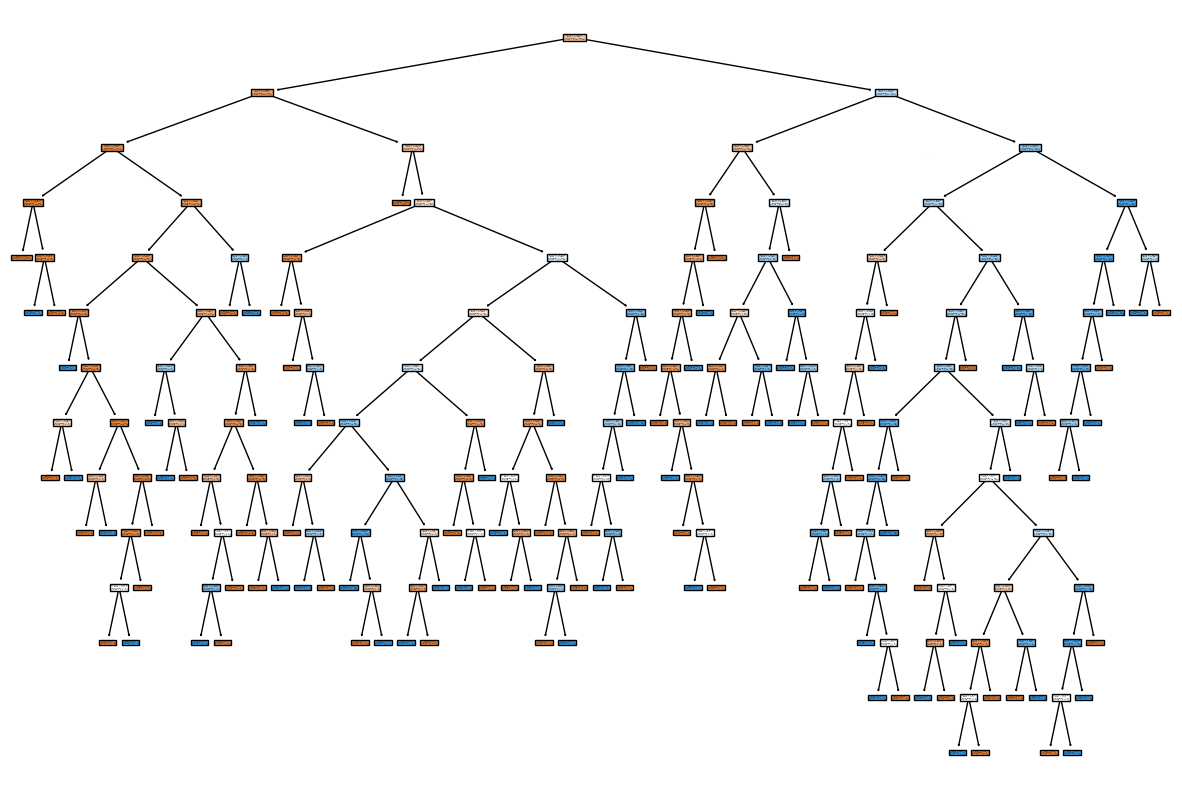

In [27]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

- It seems that dataset is little bit huge and it is not feasible to examine decision tree manually


# DecisionTree Post pruning And Hyperparameter Tuning for huge dataset

In [28]:
parameter = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21)
}

In [29]:
clf= RandomizedSearchCV(treeclassifier,param_distributions=parameter,cv=5)

In [30]:
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 21),
                                        'min_samples_split': range(2, 21),
                                        'splitter': ['best', 'random']})

In [31]:
clf.best_params_

{'splitter': 'best',
 'min_samples_split': 12,
 'min_samples_leaf': 19,
 'max_features': 'log2',
 'max_depth': 3,
 'criterion': 'log_loss'}

In [32]:
y_pred=clf.predict(X_test)

In [33]:
y_probability=clf.predict_proba(X_test)

In [34]:
y_probability

array([[0.93835616, 0.06164384],
       [0.75757576, 0.24242424],
       [0.75757576, 0.24242424],
       [0.4375    , 0.5625    ],
       [0.42063492, 0.57936508],
       [0.75757576, 0.24242424],
       [0.93835616, 0.06164384],
       [0.80851064, 0.19148936],
       [0.42063492, 0.57936508],
       [0.42063492, 0.57936508],
       [0.75757576, 0.24242424],
       [0.05128205, 0.94871795],
       [0.42063492, 0.57936508],
       [0.4375    , 0.5625    ],
       [0.80851064, 0.19148936],
       [0.80851064, 0.19148936],
       [0.93835616, 0.06164384],
       [0.93835616, 0.06164384],
       [0.05128205, 0.94871795],
       [0.75      , 0.25      ],
       [0.75757576, 0.24242424],
       [0.93835616, 0.06164384],
       [0.75757576, 0.24242424],
       [0.93835616, 0.06164384],
       [0.42063492, 0.57936508],
       [0.05128205, 0.94871795],
       [0.75757576, 0.24242424],
       [0.93835616, 0.06164384],
       [0.75757576, 0.24242424],
       [0.93835616, 0.06164384],
       [0.

In [35]:
y_score = y_probability[:,1]

In [36]:
y_score

array([0.06164384, 0.24242424, 0.24242424, 0.5625    , 0.57936508,
       0.24242424, 0.06164384, 0.19148936, 0.57936508, 0.57936508,
       0.24242424, 0.94871795, 0.57936508, 0.5625    , 0.19148936,
       0.19148936, 0.06164384, 0.06164384, 0.94871795, 0.25      ,
       0.24242424, 0.06164384, 0.24242424, 0.06164384, 0.57936508,
       0.94871795, 0.24242424, 0.06164384, 0.24242424, 0.06164384,
       0.57936508, 0.57936508, 0.94871795, 0.94871795, 0.19148936,
       0.57936508, 0.7826087 , 0.19148936, 0.24242424, 0.57936508,
       0.06164384, 0.57936508, 0.24242424, 0.24242424, 0.06164384,
       0.57936508, 0.5625    , 0.06164384, 0.5625    , 0.94871795,
       0.06164384, 0.57936508, 0.57936508, 0.25      , 0.25      ,
       0.06164384, 0.57936508, 0.06164384, 0.19148936, 0.7826087 ,
       0.57936508, 0.24242424, 0.57936508, 0.5625    , 0.06164384,
       0.25      , 0.06164384, 0.57936508, 0.24242424, 0.7826087 ,
       0.57936508, 0.06164384, 0.06164384, 0.06164384, 0.24242

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

# Confusion matrix,accuracy score,classification report

In [37]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[78 17]
 [21 38]]
0.7532467532467533
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        95
           1       0.69      0.64      0.67        59

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.75      0.75      0.75       154



In [38]:
X_pred = clf.predict(X_train)

In [39]:
print(accuracy_score(X_pred,y_train))

0.7703583061889251


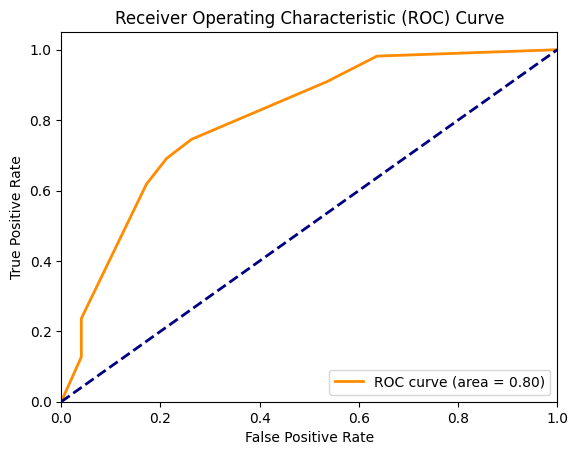

In [40]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()